In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

# The Multivariate Normal - Conditioning

## Objectives

+ To demonstrate conditioning of a multivariate normal.

## The multivariate mormal - Conditioning

Consider the $N$-dimensional multivariate normal:

$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \boldsymbol{\Sigma}\right),
$$

where $\boldsymbol{\mu}$ is a $N$-dimensional vector, $\boldsymbol{\Sigma}$ is a *positive-definite matrix*.
Assume that $\boldsymbol{\mu}$ can be decomposed in two blocks of dimensions $N_1$ and $N_2$ ($N_1 + N_2 = N$):

$$
\boldsymbol{\mu} =
\begin{pmatrix}
\boldsymbol{\mu}_1\\
\boldsymbol{\mu}_2
\end{pmatrix}.
$$

Similarly for $\boldsymbol{\Sigma}$:

$$
\boldsymbol{\Sigma} = \begin{pmatrix}
\boldsymbol{\Sigma}_1 & \boldsymbol{\Sigma}_{12}\\
\boldsymbol{\Sigma}_{12}^T&\boldsymbol{\Sigma}_2
\end{pmatrix},
$$

where $\boldsymbol{\Sigma}_{ii}$ are $N_i\times N_i$ matrices, and $\boldsymbol{\Sigma}_{12}$ is a $N_1\times N_2$ matrix.
In lecture, we saw that when you observe that $\mathbf{X}_2 = \mathbf{x}_2$, then $\mathbf{X}_1$ is distributed according to:

$$
\mathbf{X}_1|\mathbf{X}_2 = \mathbf{x}_2\sim N(\boldsymbol{\mu}_1+\boldsymbol{\Sigma}_{12}\boldsymbol{\Sigma}_2^{-1}(\mathbf{x}_2-\boldsymbol{\mu}_2), \boldsymbol{\Sigma}_1-\boldsymbol{\Sigma}_{12}\boldsymbol{\Sigma}_2^{-1}\boldsymbol{\Sigma}_{12}^T).
$$

Let's demonstrate this first for the case of one-dimensional $x_1$ and $x_2$.

In [22]:
import scipy.stats as st

# This is the multivariate normal we are going to play with
X = st.multivariate_normal(
    mean=np.array([1.0, 2.0]),
    cov=np.array(
        [
            [2.0, 0.9],
            [0.9, 4.0]
        ]
    )
)

print("X ~ N(mu, Sigma),")
print(f"mu = {X.mean}")
print("Sigma = ")
print(X.cov)
print("")

x2_observed = -2.0
print(f"x_2 = {x2_observed:.2f} (hypothetical observation)")


X ~ N(mu, Sigma),
mu = [1. 2.]
Sigma = 
[[2.  0.9]
 [0.9 4. ]]

x_2 = -2.00 (hypothetical observation)


Let's plot the contour of the joint and see where $x_2$ falls:

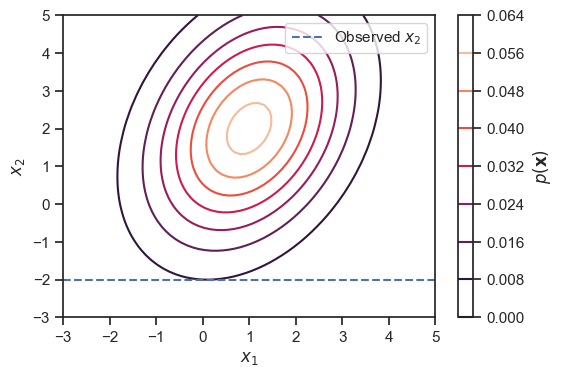

In [23]:
fig, ax = plt.subplots()
x1 = np.linspace(-3, 5, 64)
x2 = np.linspace(-3, 5, 64)
Xg1, Xg2 = np.meshgrid(x1, x2)
Xg_flat = np.hstack(
    [
        Xg1.flatten()[:, None],
        Xg2.flatten()[:, None]
    ]
)
Z = X.pdf(Xg_flat).reshape(Xg1.shape)
c = ax.contour(Xg1, Xg2, Z)
plt.colorbar(c, label=r"$p(\mathbf{x})$")
ax.plot(
    x1,
    [x2_observed] * np.ones(x1.shape[0]),
    "--", 
    label=r"Observed $x_2$")
plt.legend(loc="best")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

So, intuitively, conditioned on known $X_2 = x_2$ the values of $X_1$ must have higher probability in the intersection of the dashed line with the contours of the joint.

Let's see what is the answer we get from the theory.
We need to calculate the mean and variance of $x_1$ conditional on observing $x_2$.
Because $x_1$ is one dimensional, it is very simple to implement the formula we have above.

In [24]:
Sigma11 = X.cov[0, 0]
Sigma12 = X.cov[0, 1]
Sigma22 = X.cov[1,1]

mu1 = X.mean[0]
mu2 = X.mean[1]

mu1_cond = mu1 + Sigma12 * (x2_observed - mu2) / Sigma22

Sigma11_cond = Sigma11 - Sigma12 ** 2 / Sigma22

print(f"x_1 | x_2 ~ N(mu = {mu1_cond:.2f}, sigma^2 = {Sigma11_cond:.2f})")

x_1 | x_2 ~ N(mu = 0.10, sigma^2 = 1.80)


Let's plot this conditional pdf for $x_1$ and compare it to its marginal pdf:

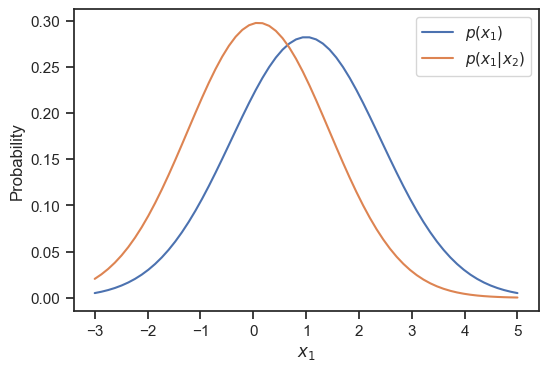

In [25]:
X1_cond = st.norm(
    loc=mu1_cond,
    scale=np.sqrt(Sigma11_cond)
)
X1_marg = st.norm(
    loc=X.mean[0],
    scale=np.sqrt(Sigma11)
)
fig, ax = plt.subplots()
ax.plot(
    x1,
    X1_marg.pdf(x1),
    label=r"$p(x_1)$"
)
ax.plot(
    x1,
    X1_cond.pdf(x1),
    label=r"$p(x_1|x_2)$"
)
ax.set_xlabel(r"$x_1$")
ax.set_ylabel("Probability")
plt.legend(loc="best");

This is our first example of how Bayes' rule can be used to condition on observations.
In the plot above, you can think of $p(x_1)$ as the best think you can say about $x_1$ before you see any data.
Then, you see an observation of $x_2$.
Because $x_1$ and $x_2$ are correlated, your state of knowledge about $x_1$ changes.
This is captured by the conditional $p(x_1|x_2)$.

## Questions

+ Rerun the code above multiple times to see how the conditinal PDF moves around as other points are picked randomly.
+ Modify the code so that you get the conditional PDF of $X_2$ given $X_1=x_1$.